In [1]:
# NOTE: pip shows imcompatible errors due to preinstalled libraries but you do not need to care
!pip install -q espnet==0.10.3 pyopenjtalk==0.1.5 parallel_wavegan==0.5.3 espnet_model_zoo

     |████████████████████████████████| 907 kB 5.4 MB/s 
     |████████████████████████████████| 1.5 MB 36.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68 kB 842 kB/s 
     |████████████████████████████████| 174 kB 47.6 MB/s 
     |████████████████████████████████| 1.2 MB 38.0 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
     |████████████████████████████████| 212 kB 49.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 38.1 MB/s 
     |████████████████████████████████| 125 kB 52.5 MB/s 
     |████████████████████████████████| 13.1 MB 35.7 MB/s 
     |████████████████████████████████| 1.7 MB 39.5 MB/s 
     |████████████████████████████████| 71 kB 7.8 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 


# **ASR MODEL**

In [2]:
#@title Choose Spanish ASR model { run: "auto" }

lang = 'es'
fs = 16000 #@param {type:"integer"}
tag = 'ftshijt/mls_asr_transformer_valid.acc.best' #@param ["ftshijt/mls_asr_transformer_valid.acc.best"] {type:"string"}

In [3]:
import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
     nbest=1
    
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
https://zenodo.org/record/4458452/files/asr_transformer_valid.acc.best.zip?download=1: 100%|██████████| 131M/131M [00:41<00:00, 3.34MB/s]


Cloning into 'ESPNet_asr_egs'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 44 (delta 10), reused 39 (delta 9), pack-reused 0
Unpacking objects: 100% (44/44), done.


/usr/local/lib/python3.7/dist-packages/espnet2/layers/stft.py:119: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  olens = (ilens - self.win_length) // self.hop_length + 1
/usr/local/lib/python3.7/dist-packages/espnet/nets/ctc_prefix_score.py:326: RuntimeWarning: invalid value encountered in logaddexp
  r_prev[:, 0], r_prev[:, 1]


Input Speech: ESPNet_asr_egs/es/6.wav


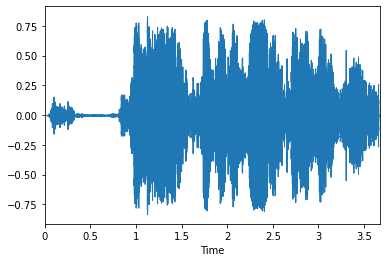

Reference text: HABITA EN AGUAS POCO PROFUNDAS Y ROCOSAS
ASR hypothesis: GRANDES PROFUNDAS QUE TODOS
**************************************************
Input Speech: ESPNet_asr_egs/es/7.wav


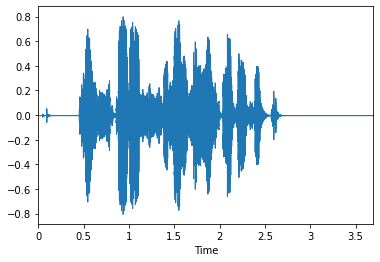

Reference text: LAS GUITARRAS SIGUEN EL MISMO CONCEPTO
ASR hypothesis: IRÁS BIEN EL MISMO
**************************************************
Input Speech: ESPNet_asr_egs/es/8.wav


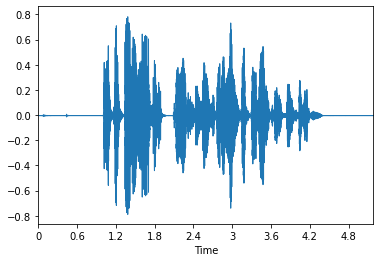

Reference text: ESTA PALOMA ES CONOCIDA SOLAMENTE POR RESTOS FÓSILES
ASR hypothesis: ÉSTA PARÓ MÁS ESCONDIDAS HORAS DESPUÉS
**************************************************


In [4]:
!git clone https://github.com/ftshijt/ESPNet_asr_egs.git

import pandas as pd
import soundfile
import librosa.display
from IPython.display import display, Audio
import matplotlib.pyplot as plt


egs = pd.read_csv("ESPNet_asr_egs/egs.csv")
for index, row in egs.iterrows():
  if row["lang"] == lang or lang == "multilingual":
    speech, rate = soundfile.read("ESPNet_asr_egs/" + row["path"])
    assert fs == int(row["sr"])
    nbests = speech2text(speech)

    text, *_ = nbests[0]
    print(f"Input Speech: ESPNet_asr_egs/{row['path']}")
    # let us listen to samples
    display(Audio(speech, rate=rate))
    librosa.display.waveplot(speech, sr=rate)
    plt.show()
    print(f"Reference text: {text_normalizer(row['text'])}")
    print(f"ASR hypothesis: {text_normalizer(text)}")
    print("*" * 50)


In [5]:
nbests = speech2text(speech)
text, *_ = nbests[0]

print(f"ASR hypothesis: {text_normalizer(text)}")

/usr/local/lib/python3.7/dist-packages/espnet2/layers/stft.py:119: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  olens = (ilens - self.win_length) // self.hop_length + 1


ASR hypothesis: ÉSTA PARÓ MÁS ESCONDIDAS HORAS DESPUÉS


# **ST**

In [6]:
pip install deep-translator

     |████████████████████████████████| 97 kB 3.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [7]:
from deep_translator import GoogleTranslator
to_translate = text_normalizer(text)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)

print(translated)

THIS STOPPED MORE HIDDEN HOURS LATER


# **TTS Model**

In [13]:
#@title Choose English model { run: "auto" }
lang = 'English'
tag = 'kan-bayashi/ljspeech_vits' #@param ["kan-bayashi/ljspeech_tacotron2", "kan-bayashi/ljspeech_fastspeech", "kan-bayashi/ljspeech_fastspeech2", "kan-bayashi/ljspeech_conformer_fastspeech2", "kan-bayashi/ljspeech_joint_finetune_conformer_fastspeech2_hifigan", "kan-bayashi/ljspeech_joint_train_conformer_fastspeech2_hifigan", "kan-bayashi/ljspeech_vits"] {type:"string"}
vocoder_tag = "none" #@param ["none", "parallel_wavegan/ljspeech_parallel_wavegan.v1", "parallel_wavegan/ljspeech_full_band_melgan.v2", "parallel_wavegan/ljspeech_multi_band_melgan.v2", "parallel_wavegan/ljspeech_hifigan.v1", "parallel_wavegan/ljspeech_style_melgan.v1"] {type:"string"}

In [14]:
from espnet2.bin.tts_inference import Text2Speech
from espnet2.utils.types import str_or_none

text2speech = Text2Speech.from_pretrained(
    model_tag=str_or_none(tag),
    vocoder_tag=str_or_none(vocoder_tag),
    device="cuda",
    # Only for Tacotron 2 & Transformer
    threshold=0.5,
    # Only for Tacotron 2
    minlenratio=0.0,
    maxlenratio=10.0,
    use_att_constraint=False,
    backward_window=1,
    forward_window=3,
    # Only for FastSpeech & FastSpeech2 & VITS
    speed_control_alpha=1.0,
    # Only for VITS
    noise_scale=0.333,
    noise_scale_dur=0.333,
)

https://zenodo.org/record/5443814/files/tts_train_vits_raw_phn_tacotron_g2p_en_no_space_train.total_count.ave.zip?download=1: 100%|██████████| 356M/356M [00:58<00:00, 6.37MB/s]


In [15]:
import time
import torch

# decide the input sentence by yourself
print(f"Input your favorite sentence in {lang}.")
x = translated
print(x)
# synthesis
with torch.no_grad():
    start = time.time()
    wav = text2speech(x)["wav"]
rtf = (time.time() - start) / (len(wav) / text2speech.fs)
print(f"RTF = {rtf:5f}")

# let us listen to generated samples
from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=text2speech.fs))

Input your favorite sentence in English.
THIS STOPPED MORE HIDDEN HOURS LATER
RTF = 0.560402


In [16]:

print("English "+translated)
translatedAR = GoogleTranslator(source='auto', target='es').translate(to_translate)
print("Spanish: "+translatedAR)

English THIS STOPPED MORE HIDDEN HOURS LATER
Spanish: ÉSTA PARÓ MÁS ESCONDIDAS HORAS DESPUÉS
